# CLUB algorithm draft - Online Clustering of Bandits

Antoine GRELETY

Vincent LE MEUR

In [112]:
import numpy as np
import numpy.random as npr
import numpy.linalg
import pandas as pd
from scipy.spatial.distance import euclidean
import networkx as nx
import matplotlib.pyplot as plt
#plt.switch_backend('agg')

In [214]:
%load_ext autoreload
%autoreload 2
import online_cluster

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [215]:
n_user=40
T=5000
D=5
c=5
Online = online_cluster.OLCB(T=T,n_user=n_user,D=D,c=3,graph_density=3*int(np.log(n_user)*n_user))
Online_UCB_IND = online_cluster.OLCB(T=T,n_user=n_user,D=D,c=c,graph_density=1)

In [216]:
Online.U

array([[ 0.18632058,  0.41877461,  0.85236853, -0.04013411,  0.24853494],
       [ 0.61665106,  0.42147717,  0.3161435 ,  0.28780795,  0.50923309],
       [ 0.38976201,  0.27055183,  0.66644106,  0.34878822,  0.45726401],
       [ 0.395801  ,  0.58241661,  0.5229849 ,  0.06582141,  0.47569613],
       [ 0.32092522,  0.55309862,  0.36528252,  0.60459602,  0.30351484],
       [ 0.57245177,  0.18228175,  0.58450025,  0.28764747,  0.46334731],
       [ 0.51286265,  0.51127365,  0.11509309,  0.28226742,  0.61858697],
       [ 0.39930709,  0.25601792,  0.30136475,  0.56082678,  0.60799776],
       [ 0.45826636,  0.24448762,  0.50286607,  0.6880314 ,  0.06289875],
       [ 0.35596675,  0.41259963,  0.46652001,  0.42856953,  0.54930543],
       [ 0.44705148,  0.49122446,  0.51317626,  0.37737704,  0.39125465],
       [ 0.47033087,  0.48829034,  0.30170368,  0.46342587,  0.48432713],
       [ 0.3567078 ,  0.50426167,  0.48136438,  0.48279193,  0.39202041],
       [ 0.3951302 ,  0.51777217,  0.4

In [192]:
np.linalg.norm(Online.U,axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

On représente tous les n_users :

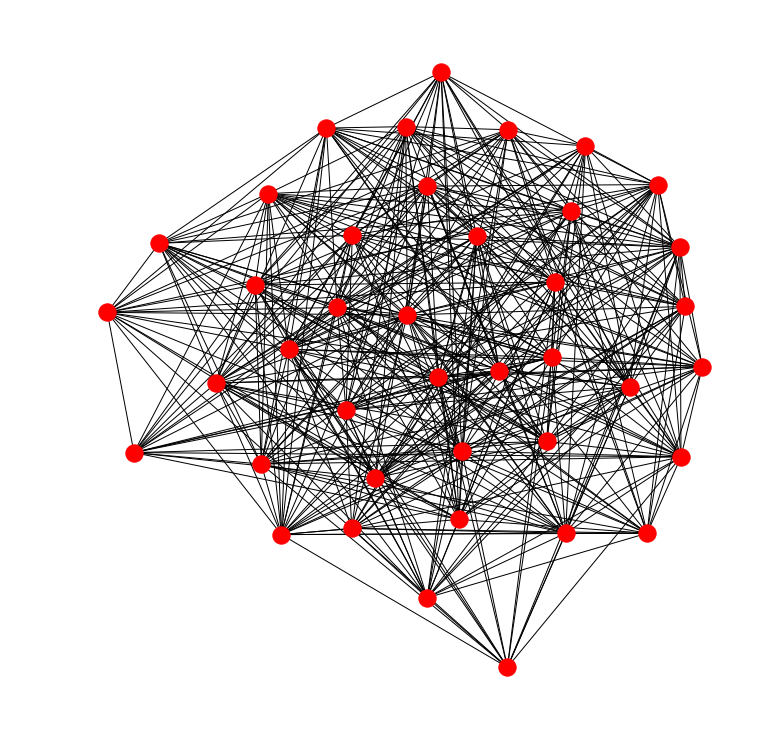

In [28]:
plt.figure(figsize=(10,10))
nx.draw(Online.V)
plt.show()
#plt.savefig('graphe_initial.png')

In [217]:
#paramètrage des algorithmes
sigma=0.3
alpha=5
alpha2=1
z=0
method = "fixed design"

#### Algorithme CLUB

In [218]:
list_m, list_CB, list_omega, list_payoff, list_random_payoff, regret_cum, regret_cum_random, V = Online.CLUB(sigma=sigma,alpha=alpha,alpha2=alpha2,z=z,method=method)

#### Algorithme LINUCB_IND 

In [219]:
list_payoff_Lin,regret_cum_Lin,regret_cum_random_Lin = Online.LinUCB_IND(sigma=sigma,alpha=alpha,method=method)

Regardons l'évolution du nombre de Cluster au fur et à mesure des itérations :

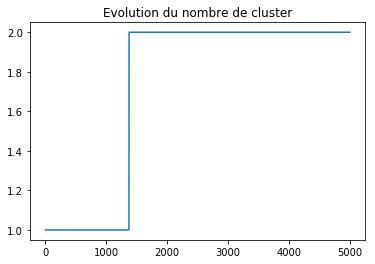

In [220]:
fig = plt.figure()
plt.plot(list_m)
plt.title("Evolution du nombre de cluster")
plt.show()

Observons l'évolution des Confidence Bound :

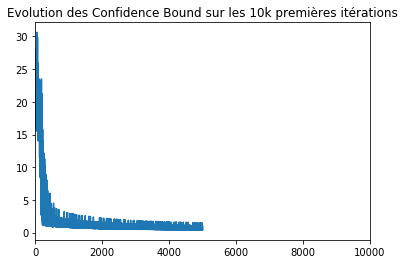

In [108]:
plt.figure()
plt.plot(list_CB)
plt.title("Evolution des Confidence Bound sur les 10k premières itérations")
plt.xlim(0,10000)
plt.show()
#plt.savefig('CB_evol.png')

Observons l'évolution de la payoff cumulée en fonction des ittérations :

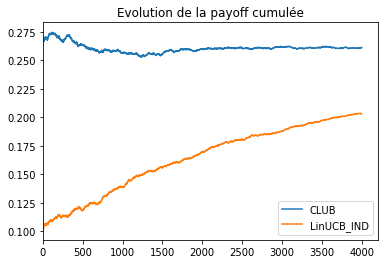

In [221]:
plt.figure()
plt.plot(Online.payoff_cum(list_payoff)[1000:Online.T])
plt.plot(Online.payoff_cum(list_payoff_Lin)[1000:Online.T])
plt.xlim(0,)
plt.title("Evolution de la payoff cumulée")
plt.legend(["CLUB","LinUCB_IND"])
plt.show()
#plt.savefig('payoff_cumul.png')

Observons enfin le regret cumulé associé : 

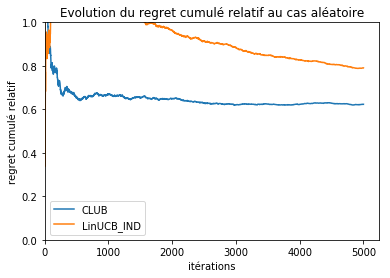

In [222]:
#plt.plot(-regret_cum_random)
plt.figure()
plt.plot(regret_cum/regret_cum_random)
plt.plot(regret_cum_Lin/regret_cum_random_Lin)
plt.legend(["CLUB","LinUCB_IND"])
plt.xlim(0,)
plt.ylim(0,1)
plt.xlabel("itérations")
plt.ylabel("regret cumulé relatif")
plt.title("Evolution du regret cumulé relatif au cas aléatoire")
plt.show()
plt.savefig('regret_cumul.png')

Les nouveux clusters sont :

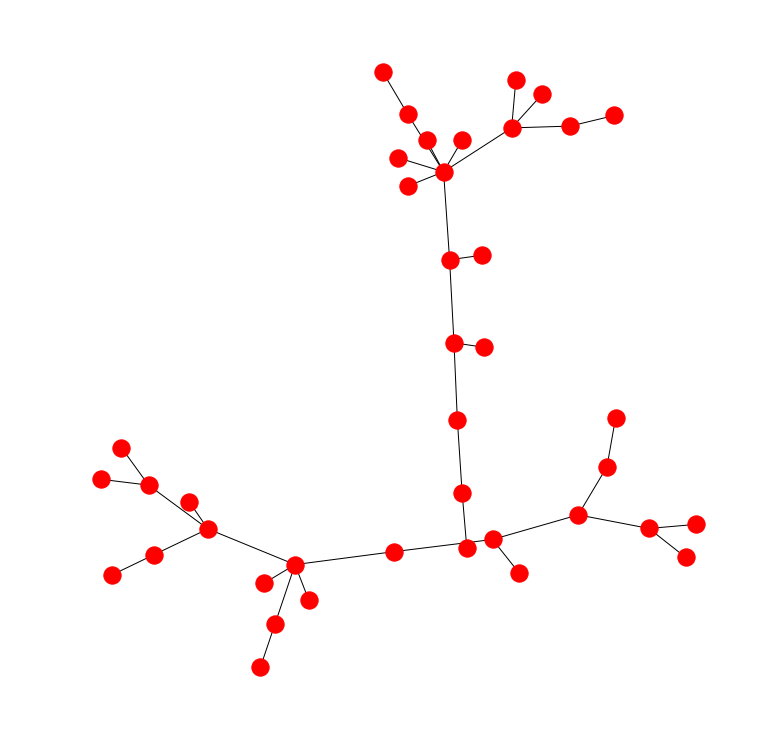

In [206]:
plt.figure(figsize=(10,10))
nx.draw(V)
plt.show()